# Colab Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Defining Project Root

In [8]:
# use "./" instead if running this notebook locally at project root and all required resource files are downloaded.
project_root = "/content/drive/MyDrive/"

# Import Section

In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Flatten, Input

from sklearn.model_selection import train_test_split

import math

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, accuracy_score, precision_score

import matplotlib.pyplot as plt

%matplotlib inline

# Defining Input Parameters

In [10]:
classes_name = ['acoustic',
 'folk',
 'blues',
 'jazz',
 'classical',
 'opera',
 'club',
 'instrumental',
 'country',
 'electronic',
 'hip-hop',
 'rock',
 'metal',
 'pop',
 'r&b/soul',
 'reggae',
 'latin',
 'industrial']
n_classes = len(classes_name)

In [12]:
parent_dir = './music_data'
X = np.load(parent_dir + "/" + 'chroma.npy')
y = np.load(parent_dir + "/" +  'y.npy')

In [13]:
X.shape

(12960, 12, 640)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=1234)

In [15]:
def print_class_count(y_train,y_val,y_test):
    classes_train, counts_train = np.unique(y_train, return_counts=True)
    classes_val, counts_val = np.unique(y_val, return_counts=True)
    classes_test, counts_test = np.unique(y_test, return_counts=True)
    
    print(
    """
    train class: {}
    train count: {}
    val class: {}
    val count: {}
    test class: {}
    test count: {}
    """
    .format(classes_train,counts_train,classes_val,counts_val,classes_test,counts_test))

In [16]:
print_class_count(y_train, y_val, y_test)


    train class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
    train count: [432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432]
    val class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
    val count: [144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144]
    test class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
    test count: [144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144]
    


In [17]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

# CNN Model

## Model #1

In [11]:
from keras import regularizers

In [64]:
model = Sequential([
    Conv2D(32, (3,3), activation="elu", padding="same", input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    Conv2D(32, (3,3), activation="elu", padding="same", kernel_regularizer=regularizers.l2(l=0.01)),
    MaxPooling2D(2, padding="same"),

    Conv2D(64, (3,3), activation="elu", padding="same", kernel_regularizer=regularizers.l2(l=0.01)),
    Conv2D(64, (3,3), activation="elu", padding="same", kernel_regularizer=regularizers.l2(l=0.01)),
    MaxPooling2D(2, padding="same"),
    
    Conv2D(128, (3,3), activation="elu", padding="same"),
    Conv2D(128, (3,3), activation="elu", padding="same"),
    MaxPooling2D(2, padding="same"),
    
    Conv2D(64, (3,3), activation="elu", padding="same"),

    Dropout(0.2),
    GlobalAveragePooling2D(),
    Dense(128, activation="elu"),
    Dropout(0.2),
    Dense(128, activation="elu"),
    Dropout(0.2),
    Dense(n_classes, activation="softmax"),
])

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 12, 640, 32)       320       
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 640, 32)       9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 320, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 6, 320, 64)        18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 6, 320, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 3, 160, 64)       0         
 g2D)                                                 

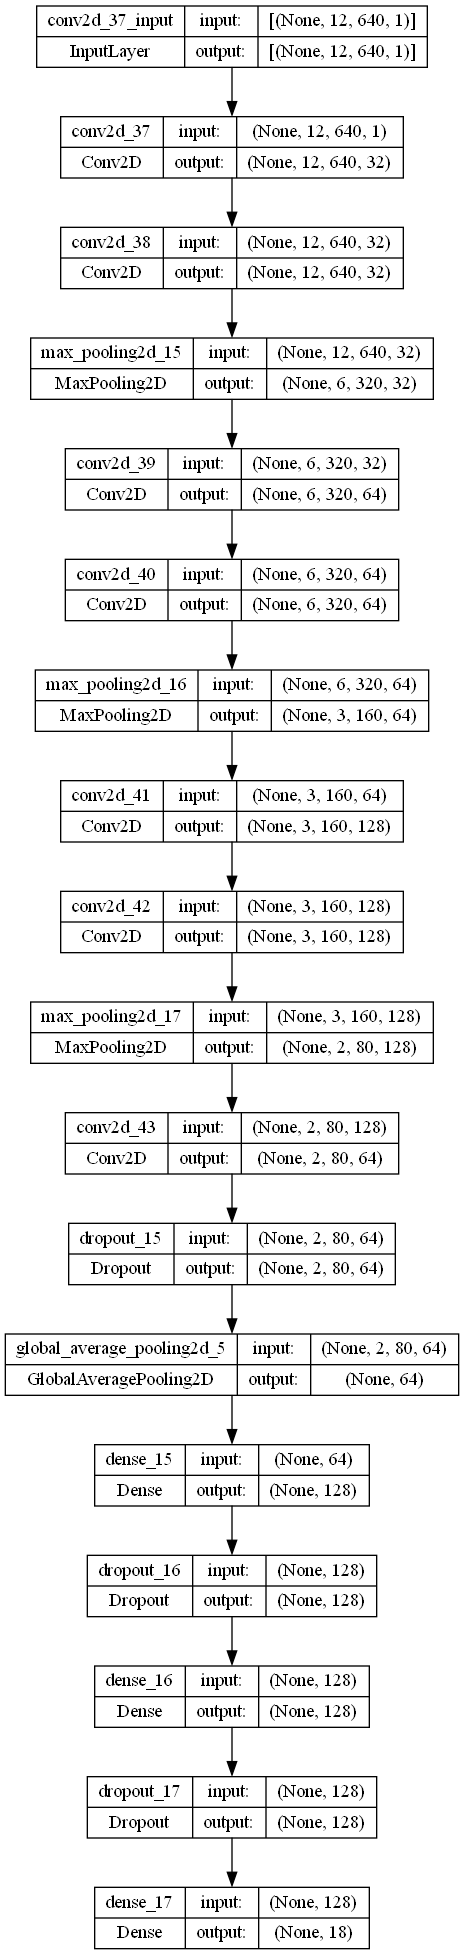

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [10]:
batch_size=125
epochs=50

In [66]:
history = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/50
63/63 [==============================] - 15s 210ms/step - loss: 3.5033 - accuracy: 0.1047 - val_loss: 3.1756 - val_accuracy: 0.0961
Epoch 2/50
63/63 [==============================] - 14s 223ms/step - loss: 3.0211 - accuracy: 0.1280 - val_loss: 2.8436 - val_accuracy: 0.1632
Epoch 3/50
63/63 [==============================] - 14s 220ms/step - loss: 2.8082 - accuracy: 0.1514 - val_loss: 2.7514 - val_accuracy: 0.1713
Epoch 4/50
63/63 [==============================] - 14s 221ms/step - loss: 2.6720 - accuracy: 0.1785 - val_loss: 2.6255 - val_accuracy: 0.1948
Epoch 5/50
63/63 [==============================] - 15s 238ms/step - loss: 2.6015 - accuracy: 0.1884 - val_loss: 2.6456 - val_accuracy: 0.1840
Epoch 6/50
63/63 [==============================] - 15s 231ms/step - loss: 2.5680 - accuracy: 0.2033 - val_loss: 2.5273 - val_accuracy: 0.1933
Epoch 7/50
63/63 [==============================] - 14s 228ms/step - loss: 2.5030 - accuracy: 0.2158 - val_loss: 2.4691 - val_accuracy: 0.2145

In [67]:
model.evaluate(X_test, y_test)

81/81 [==============================] - 2s 18ms/step - loss: 2.0296 - accuracy: 0.3877


[2.029575824737549, 0.38773149251937866]

In [70]:
# model.save('./chroma_model/chroma')

INFO:tensorflow:Assets written to: ./model/chroma\assets


INFO:tensorflow:Assets written to: ./model/chroma\assets


# Plotting Loss and Accuracy Graph

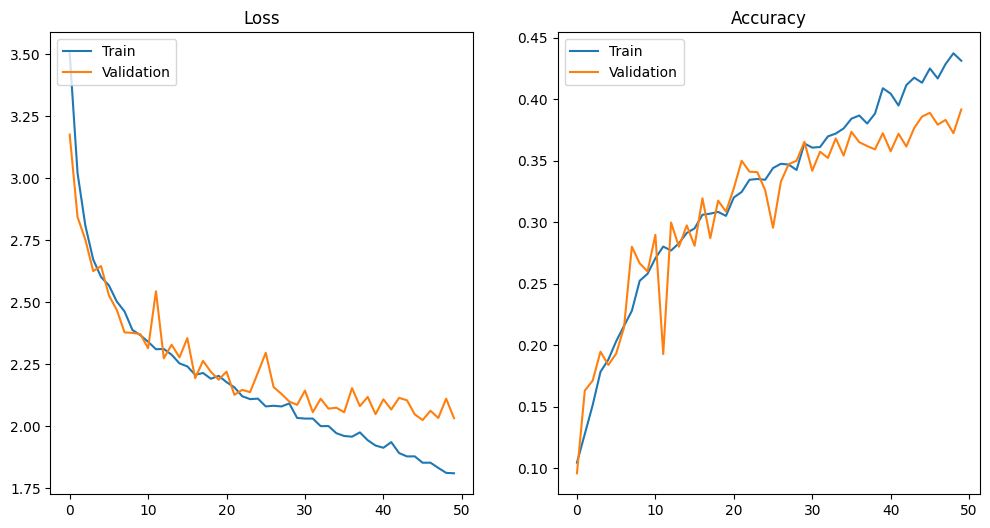

In [69]:
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(12,6)

axis[0].plot(history.history['loss'])
axis[0].plot(history.history['val_loss'])
axis[0].set_title("Loss")
axis[0].legend(['Train', 'Validation'], loc='upper left')

axis[1].plot(history.history['accuracy'])
axis[1].plot(history.history['val_accuracy'])
axis[1].set_title("Accuracy")
axis[1].legend(['Train', 'Validation'], loc='upper left')

# Testing Model

In [18]:
# Load model here
model = tf.keras.models.load_model('./chroma_model')

In [19]:
model.evaluate(X_test, y_test)

81/81 [==============================] - 4s 18ms/step - loss: 2.0296 - accuracy: 0.3877


[2.0295755863189697, 0.38773149251937866]

In [20]:
y_predict = model.predict(X_test)

81/81 [==============================] - 1s 16ms/step


In [21]:
y_predict_argmax = np.argmax(y_predict, 1)

In [22]:
y_test_argmax = np.argmax(y_test, 1)

# Confusion Matrix

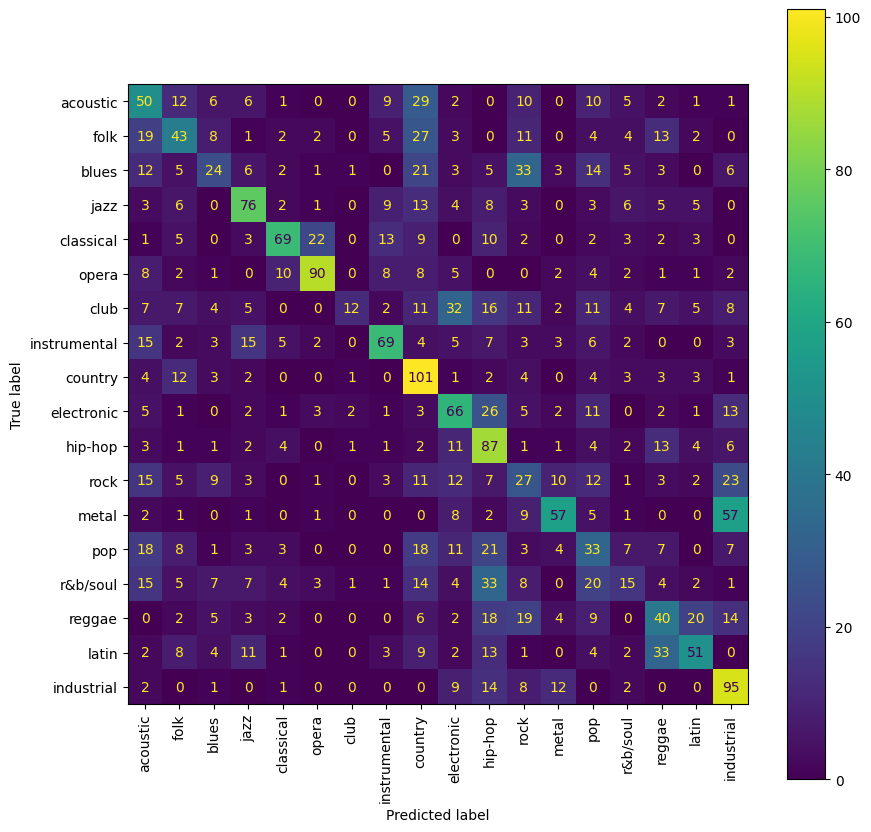

In [23]:
cm = confusion_matrix(y_test_argmax, y_predict_argmax)

fig, ax = plt.subplots(figsize=(10, 10))

ConfusionMatrixDisplay(cm, display_labels=classes_name).plot(ax=ax, xticks_rotation=90)

# Additional Metrics Illustration

In [24]:
precision = precision_score(y_test_argmax, y_predict_argmax, average=None)
recall = recall_score(y_test_argmax, y_predict_argmax, average=None)
f1 = f1_score(y_test_argmax, y_predict_argmax, average=None)

accuracy = accuracy_score(y_test_argmax, y_predict_argmax)
print("Accuracy on test set: " + str(accuracy))

Accuracy on test set: 0.38773148148148145


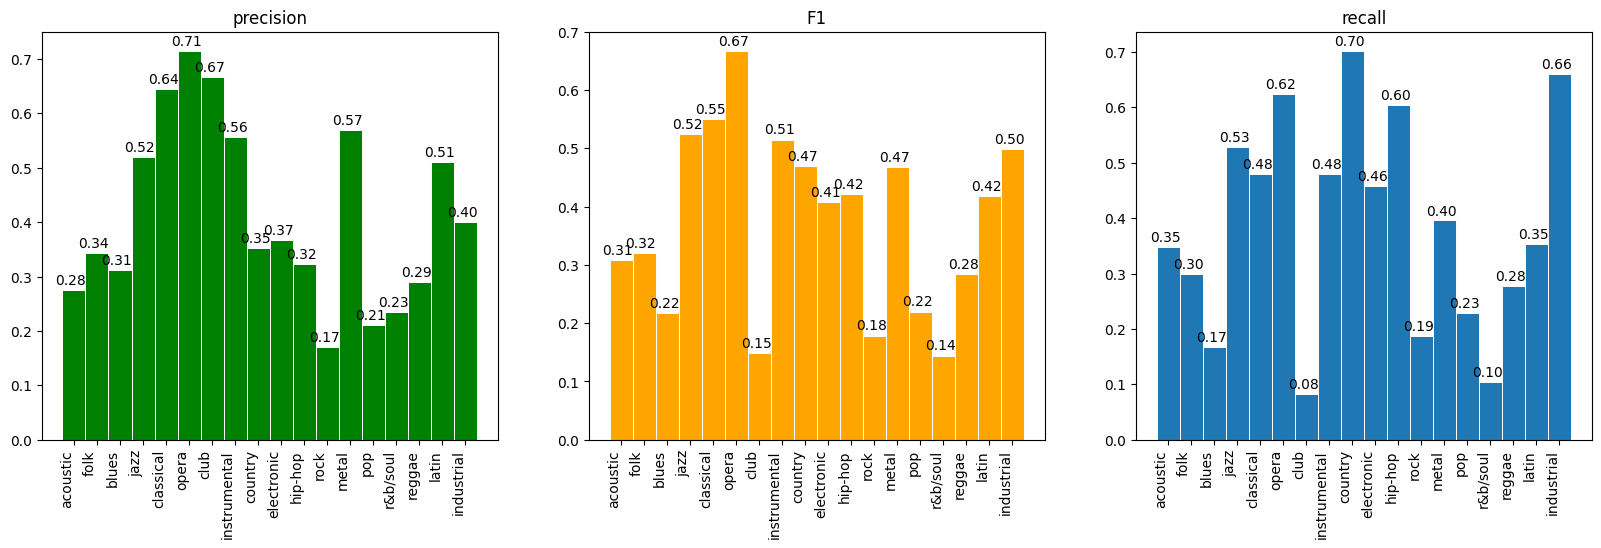

In [25]:
fig, axis = plt.subplots(1, 3)
fig.set_size_inches(20,6)
fig.autofmt_xdate(rotation=90)

axis[0].bar(classes_name, precision, width=1, edgecolor="white", linewidth=0.7, color="green")
axis[0].set_title("precision")
for i in range(len(precision)):
    axis[0].text(i - 0.8, precision[i] + 0.01, "%.2f" % precision[i])

axis[1].bar(classes_name, f1, width=1, edgecolor="white", linewidth=0.7, color="orange")
axis[1].set_title("F1")
for i in range(len(f1)):
    axis[1].text(i - 0.8, f1[i] + 0.01, "%.2f" % f1[i])

axis[2].bar(classes_name, recall, width=1, edgecolor="white", linewidth=0.7)
axis[2].set_title("recall")
for i in range(len(recall)):
    axis[2].text(i - 0.8, recall[i] + 0.01, "%.2f" % recall[i])

plt.show()